DISCOUNT RETURN EX:
    """Simple blackjack environment

    Blackjack is a card game where the goal is to obtain cards that sum to as
    near as possible to 21 without going over.  They're playing against a fixed
    dealer.
    Face cards (Jack, Queen, King) have point value 10.
    Aces can either count as 11 or 1, and it's called 'usable' at 11.
    This game is placed with an infinite deck (or with replacement).
    The game starts with each (player and dealer) having one face up and one
    face down card.

    The player can request additional cards (hit=1) until they decide to stop
    (stick=0) or exceed 21 (bust).

    After the player sticks, the dealer reveals their facedown card, and draws
    until their sum is 17 or greater.  If the dealer goes bust the player wins.

    If neither player nor dealer busts, the outcome (win, lose, draw) is
    decided by whose sum is closer to 21.  The reward for winning is +1,
    drawing is 0, and losing is -1.

    The observation of a 3-tuple of: the players current sum,
    the dealer's one showing card (1-10 where 1 is ace),
    and whether or not the player holds a usable ace (0 or 1).

    This environment corresponds to the version of the blackjack problem
    described in Example 5.1 in Reinforcement Learning: An Introduction
    by Sutton and Barto (1998).
    http://incompleteideas.net/sutton/book/the-book.html
    """

#EXPLORATION OF BLACKJACK ENVIRONMENT 

In [1]:
import gym
env = gym.make('Blackjack-v0')
obs_space = env.observation_space
act_space = env.action_space
print(obs_space)
print(act_space)
print('AGENT HAS {} POTENTIAL ACTIONS'.format(act_space))



Tuple(Discrete(32), Discrete(11), Discrete(2))
Discrete(2)
AGENT HAS Discrete(2) POTENTIAL ACTIONS


c:\users\peace\gym-retro\gym\gym\__init__.py:22: UserWarning: DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.
  warnings.warn('DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.')


In [3]:
print('LETS PLAY 21 ROUNDS WITH THIS BASIC AGENT ^__^')
for i_episode in range(21):
    state = env.reset()
    while True:
        print(state)
        action = act_space.sample()
        state, reward, done, info = env.step(action)
        if done:
            print('THE GAME IS OVER !', reward)
            print('PLAYER WON THE GAME ^____^ \n') if reward >0 else print('THE AGENT WONT THE GAME  X__x')
            break



LETS PLAY 21 ROUNDS WITH THIS BASIC AGENT ^__^
(14, 7, True)
THE GAME IS OVER ! -1.0
THE AGENT WONT THE GAME  X__x
(10, 3, False)
(12, 3, False)
THE GAME IS OVER ! -1.0
THE AGENT WONT THE GAME  X__x
(14, 9, False)
THE GAME IS OVER ! -1
THE AGENT WONT THE GAME  X__x
(7, 2, False)
THE GAME IS OVER ! -1.0
THE AGENT WONT THE GAME  X__x
(9, 1, False)
(13, 1, False)
(14, 1, False)
THE GAME IS OVER ! -1.0
THE AGENT WONT THE GAME  X__x
(10, 10, False)
(20, 10, False)
THE GAME IS OVER ! -1
THE AGENT WONT THE GAME  X__x
(9, 5, False)
THE GAME IS OVER ! 1.0
PLAYER WON THE GAME ^____^ 

(5, 10, False)
THE GAME IS OVER ! -1.0
THE AGENT WONT THE GAME  X__x
(18, 10, False)
(19, 10, False)
THE GAME IS OVER ! 1.0
PLAYER WON THE GAME ^____^ 

(6, 7, False)
(13, 7, False)
(17, 7, False)
THE GAME IS OVER ! -1
THE AGENT WONT THE GAME  X__x
(16, 10, True)
(12, 10, False)
(16, 10, False)
THE GAME IS OVER ! -1.0
THE AGENT WONT THE GAME  X__x
(8, 7, False)
(10, 7, False)
THE GAME IS OVER ! -1.0
THE AGENT WONT 

In [4]:
print('LETS PLAY 21 ROUNDS WITH THIS POLICY AGENT ^__^')
def generate_episode_from_limit(bljck_env):
    episode = []
    state = bljck_env.reset()
    while True:
        action = 0 if state[0] >18 else 1
        next_state, reward, done, info = bljck_env.step(action)
        episode.append((state,action,reward))
        state = next_state
        if done:
            print('THE GAME IS OVER !', reward)
            print('PLAYER WON THE GAME ^____^ \n') if reward >0 else print('THE AGENT WONT THE GAME  X__x')
            break
    return episode
for i in range(21):
    print(generate_episode_from_limit(env))


LETS PLAY 21 ROUNDS WITH THIS POLICY AGENT ^__^
THE GAME IS OVER ! 1.0
PLAYER WON THE GAME ^____^ 

[((12, 10, True), 1, 0), ((21, 10, True), 0, 1.0)]
THE GAME IS OVER ! -1
THE AGENT WONT THE GAME  X__x
[((16, 8, False), 1, -1)]
THE GAME IS OVER ! -1
THE AGENT WONT THE GAME  X__x
[((12, 9, False), 1, 0), ((15, 9, False), 1, -1)]
THE GAME IS OVER ! -1
THE AGENT WONT THE GAME  X__x
[((7, 3, False), 1, 0), ((16, 3, False), 1, -1)]
THE GAME IS OVER ! 1.0
PLAYER WON THE GAME ^____^ 

[((19, 8, False), 0, 1.0)]
THE GAME IS OVER ! 0.0
THE AGENT WONT THE GAME  X__x
[((20, 9, False), 0, 0.0)]
THE GAME IS OVER ! -1
THE AGENT WONT THE GAME  X__x
[((17, 9, False), 1, -1)]
THE GAME IS OVER ! 1.0
PLAYER WON THE GAME ^____^ 

[((21, 7, True), 0, 1.0)]
THE GAME IS OVER ! 1.0
PLAYER WON THE GAME ^____^ 

[((20, 5, False), 0, 1.0)]
THE GAME IS OVER ! -1
THE AGENT WONT THE GAME  X__x
[((4, 10, False), 1, 0), ((14, 10, False), 1, -1)]
THE GAME IS OVER ! 1.0
PLAYER WON THE GAME ^____^ 

[((10, 10, False), 

Using TensorFlow backend.


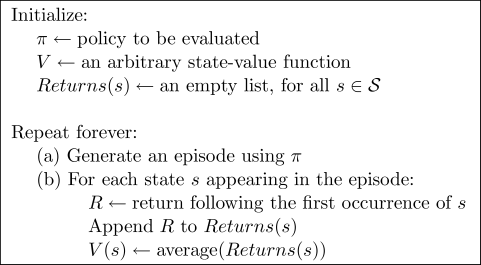

In [5]:
from keras.preprocessing import  image

image.load_img('pseudotmp3.png')


In [75]:
from collections import defaultdict
import numpy as np
import sys
act_space = env.action_space
def monte(env,num_episodes, gen_ep, gamma=.65):
    returns = defaultdict(list)
    for i_episode in range(1,num_episodes+1):
        if i_episode % 1000 == 0:
            print('\rEpiseode {}/{}'.format(i_episode,num_episodes), end=' ')
            sys.stdout.flush()
    


        num_episodes = 10000
        for i_episode in range(num_episodes):
            done = False
            s_0 = env.reset()
            gen_ep = []

            state = [s_0]
            while done == False:
                # Implement policy
                if s_0[0] >= 18:
                    s_1, reward, done, info = env.step(0)
                else:
                    s_1, reward,done, info = env.step(1)
            
                gen_ep.append((reward*gamma,state))
                returns.get(reward)
                print(gen_ep,'\n')
                state.append((s_0,reward))

                if done == True:
                    print('done \n',reward*gamma)
                    print('play won:',reward*gamma) if reward>0*gamma else print('agent won:',reward*gamma)
                    break
                    continue
                    for s_i, s in i_episode(state[:-1]):
                        Vs = np.average(gen_ep[s_i:])*gamma
                        print('Vs:',Vs)
                    break
                    
        return 
                

print(monte(env,2,gen_ep=generate_episode_from_limit))



[(-0.65, [(15, 10, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(14, 3, True)])] 

[(0.0, [(14, 3, True), ((14, 3, True), 0)]), (0.0, [(14, 3, True), ((14, 3, True), 0)])] 

[(0.0, [(14, 3, True), ((14, 3, True), 0), ((14, 3, True), 0)]), (0.0, [(14, 3, True), ((14, 3, True), 0), ((14, 3, True), 0)]), (-0.65, [(14, 3, True), ((14, 3, True), 0), ((14, 3, True), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(14, 4, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(13, 4, False)])] 

[(0.0, [(13, 4, False), ((13, 4, False), 0)]), (0.0, [(13, 4, False), ((13, 4, False), 0)])] 

[(0.0, [(13, 4, False), ((13, 4, False), 0), ((13, 4, False), 0)]), (0.0, [(13, 4, False), ((13, 4, False), 0), ((13, 4, False), 0)]), (-0.65, [(13, 4, False), ((13, 4, False), 0), ((13, 4, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(12, 1, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(12, 10, False)])] 

[(0.0, [(12, 10, False), ((12, 10, False), 0)]), (0.0, [(12, 10, False), ((12, 10, Fal

[(0.0, [(13, 3, False)])] 

[(0.0, [(13, 3, False), ((13, 3, False), 0)]), (-0.65, [(13, 3, False), ((13, 3, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(12, 10, False)])] 

[(0.0, [(12, 10, False), ((12, 10, False), 0)]), (-0.65, [(12, 10, False), ((12, 10, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(5, 5, False)])] 

[(0.0, [(5, 5, False), ((5, 5, False), 0)]), (0.0, [(5, 5, False), ((5, 5, False), 0)])] 

[(0.0, [(5, 5, False), ((5, 5, False), 0), ((5, 5, False), 0)]), (0.0, [(5, 5, False), ((5, 5, False), 0), ((5, 5, False), 0)]), (-0.65, [(5, 5, False), ((5, 5, False), 0), ((5, 5, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(17, 10, False)])] 

[(0.0, [(17, 10, False), ((17, 10, False), 0)]), (-0.65, [(17, 10, False), ((17, 10, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(14, 5, False)])] 

[(0.0, [(14, 5, False), ((14, 5, False), 0)]), (0.0, [(14, 5, False), ((14, 5, False), 0)])] 

[(0.0, [(14, 5, False), ((14, 5, False), 0), ((14, 5, Fal


done 
 -0.65
agent won: -0.65
[(0.0, [(10, 1, False)])] 

[(0.0, [(10, 1, False), ((10, 1, False), 0)]), (-0.65, [(10, 1, False), ((10, 1, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(17, 7, False)])] 

[(0.0, [(17, 7, False), ((17, 7, False), 0)]), (-0.65, [(17, 7, False), ((17, 7, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(13, 7, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(19, 5, False)])] 

done 
 0.0
agent won: 0.0
[(0.65, [(19, 7, False)])] 

done 
 0.65
play won: 0.65
[(-0.65, [(19, 3, False)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(14, 10, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(9, 10, False)])] 

[(0.0, [(9, 10, False), ((9, 10, False), 0)]), (0.0, [(9, 10, False), ((9, 10, False), 0)])] 

[(0.0, [(9, 10, False), ((9, 10, False), 0), ((9, 10, False), 0)]), (0.0, [(9, 10, False), ((9, 10, False), 0), ((9, 10, False), 0)]), (-0.65, [(9, 10, False), ((9, 10, False), 0), ((9, 10, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(

 -0.65
agent won: -0.65
[(0.0, [(11, 6, False)])] 

[(0.0, [(11, 6, False), ((11, 6, False), 0)]), (0.0, [(11, 6, False), ((11, 6, False), 0)])] 

[(0.0, [(11, 6, False), ((11, 6, False), 0), ((11, 6, False), 0)]), (0.0, [(11, 6, False), ((11, 6, False), 0), ((11, 6, False), 0)]), (-0.65, [(11, 6, False), ((11, 6, False), 0), ((11, 6, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.65, [(19, 2, True)])] 

done 
 0.65
play won: 0.65
[(0.0, [(11, 7, False)])] 

[(0.0, [(11, 7, False), ((11, 7, False), 0)]), (0.0, [(11, 7, False), ((11, 7, False), 0)])] 

[(0.0, [(11, 7, False), ((11, 7, False), 0), ((11, 7, False), 0)]), (0.0, [(11, 7, False), ((11, 7, False), 0), ((11, 7, False), 0)]), (0.0, [(11, 7, False), ((11, 7, False), 0), ((11, 7, False), 0)])] 

[(0.0, [(11, 7, False), ((11, 7, False), 0), ((11, 7, False), 0), ((11, 7, False), 0)]), (0.0, [(11, 7, False), ((11, 7, False), 0), ((11, 7, False), 0), ((11, 7, False), 0)]), (0.0, [(11, 7, False), ((11, 7, False), 0), ((11, 7, False

 -0.65
agent won: -0.65
[(0.65, [(19, 5, True)])] 

done 
 0.65
play won: 0.65
[(0.0, [(13, 6, False)])] 

[(0.0, [(13, 6, False), ((13, 6, False), 0)]), (-0.65, [(13, 6, False), ((13, 6, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(8, 7, False)])] 

[(0.0, [(8, 7, False), ((8, 7, False), 0)]), (0.0, [(8, 7, False), ((8, 7, False), 0)])] 

[(0.0, [(8, 7, False), ((8, 7, False), 0), ((8, 7, False), 0)]), (0.0, [(8, 7, False), ((8, 7, False), 0), ((8, 7, False), 0)]), (-0.65, [(8, 7, False), ((8, 7, False), 0), ((8, 7, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(13, 4, False)])] 

[(0.0, [(13, 4, False), ((13, 4, False), 0)]), (-0.65, [(13, 4, False), ((13, 4, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(15, 10, False)])] 

[(0.0, [(15, 10, False), ((15, 10, False), 0)]), (0.0, [(15, 10, False), ((15, 10, False), 0)])] 

[(0.0, [(15, 10, False), ((15, 10, False), 0), ((15, 10, False), 0)]), (0.0, [(15, 10, False), ((15, 10, False), 0), ((15, 10, False), 0)]

[(0.65, [(18, 10, False)])] 

done 
 0.65
play won: 0.65
[(0.0, [(15, 10, False)])] 

[(0.0, [(15, 10, False), ((15, 10, False), 0)]), (-0.65, [(15, 10, False), ((15, 10, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(10, 6, False)])] 

[(0.0, [(10, 6, False), ((10, 6, False), 0)]), (0.0, [(10, 6, False), ((10, 6, False), 0)])] 

[(0.0, [(10, 6, False), ((10, 6, False), 0), ((10, 6, False), 0)]), (0.0, [(10, 6, False), ((10, 6, False), 0), ((10, 6, False), 0)]), (-0.65, [(10, 6, False), ((10, 6, False), 0), ((10, 6, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(14, 10, True)])] 

[(0.0, [(14, 10, True), ((14, 10, True), 0)]), (0.0, [(14, 10, True), ((14, 10, True), 0)])] 

[(0.0, [(14, 10, True), ((14, 10, True), 0), ((14, 10, True), 0)]), (0.0, [(14, 10, True), ((14, 10, True), 0), ((14, 10, True), 0)]), (0.0, [(14, 10, True), ((14, 10, True), 0), ((14, 10, True), 0)])] 

[(0.0, [(14, 10, True), ((14, 10, True), 0), ((14, 10, True), 0), ((14, 10, True), 0)]), (0.0, [(

agent won: -0.65
[(0.65, [(20, 10, False)])] 

done 
 0.65
play won: 0.65
[(0.65, [(20, 10, False)])] 

done 
 0.65
play won: 0.65
[(-0.65, [(17, 10, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(14, 10, False)])] 

[(0.0, [(14, 10, False), ((14, 10, False), 0)]), (-0.65, [(14, 10, False), ((14, 10, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(14, 3, False)])] 

[(0.0, [(14, 3, False), ((14, 3, False), 0)]), (-0.65, [(14, 3, False), ((14, 3, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(8, 8, False)])] 

[(0.0, [(8, 8, False), ((8, 8, False), 0)]), (0.0, [(8, 8, False), ((8, 8, False), 0)])] 

[(0.0, [(8, 8, False), ((8, 8, False), 0), ((8, 8, False), 0)]), (0.0, [(8, 8, False), ((8, 8, False), 0), ((8, 8, False), 0)]), (0.0, [(8, 8, False), ((8, 8, False), 0), ((8, 8, False), 0)])] 

[(0.0, [(8, 8, False), ((8, 8, False), 0), ((8, 8, False), 0), ((8, 8, False), 0)]), (0.0, [(8, 8, False), ((8, 8, False), 0), ((8, 8, False), 0), ((8, 8, False), 0)]), (0.0, [(8, 

[(0.0, [(12, 9, False), ((12, 9, False), 0)]), (-0.65, [(12, 9, False), ((12, 9, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(10, 4, False)])] 

[(0.0, [(10, 4, False), ((10, 4, False), 0)]), (-0.65, [(10, 4, False), ((10, 4, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.65, [(19, 3, False)])] 

done 
 0.65
play won: 0.65
[(0.0, [(14, 5, True)])] 

[(0.0, [(14, 5, True), ((14, 5, True), 0)]), (0.0, [(14, 5, True), ((14, 5, True), 0)])] 

[(0.0, [(14, 5, True), ((14, 5, True), 0), ((14, 5, True), 0)]), (0.0, [(14, 5, True), ((14, 5, True), 0), ((14, 5, True), 0)]), (-0.65, [(14, 5, True), ((14, 5, True), 0), ((14, 5, True), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.65, [(21, 8, True)])] 

done 
 0.65
play won: 0.65
[(0.65, [(19, 8, False)])] 

done 
 0.65
play won: 0.65
[(-0.65, [(18, 1, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(12, 8, False)])] 

[(0.0, [(12, 8, False), ((12, 8, False), 0)]), (-0.65, [(12, 8, False), ((12, 8, False), 0)])] 

done 
 -0.65
agent wo

[(0.0, [(16, 8, False)])] 

[(0.0, [(16, 8, False), ((16, 8, False), 0)]), (-0.65, [(16, 8, False), ((16, 8, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.65, [(20, 5, False)])] 

done 
 0.65
play won: 0.65
[(0.0, [(13, 10, False)])] 

[(0.0, [(13, 10, False), ((13, 10, False), 0)]), (-0.65, [(13, 10, False), ((13, 10, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(17, 1, False)])] 

done 
 -0.65
agent won: -0.65
[(0.65, [(20, 2, True)])] 

done 
 0.65
play won: 0.65
[(0.0, [(12, 4, False)])] 

[(0.0, [(12, 4, False), ((12, 4, False), 0)]), (0.0, [(12, 4, False), ((12, 4, False), 0)])] 

[(0.0, [(12, 4, False), ((12, 4, False), 0), ((12, 4, False), 0)]), (0.0, [(12, 4, False), ((12, 4, False), 0), ((12, 4, False), 0)]), (-0.65, [(12, 4, False), ((12, 4, False), 0), ((12, 4, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(16, 7, False)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(14, 9, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(16, 10, False)])] 

[(0.0,

agent won: -0.65
[(-0.65, [(18, 10, True)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(12, 1, False)])] 

[(0.0, [(12, 1, False), ((12, 1, False), 0)]), (-0.65, [(12, 1, False), ((12, 1, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(12, 10, True)])] 

[(0.0, [(12, 10, True), ((12, 10, True), 0)]), (0.0, [(12, 10, True), ((12, 10, True), 0)])] 

[(0.0, [(12, 10, True), ((12, 10, True), 0), ((12, 10, True), 0)]), (0.0, [(12, 10, True), ((12, 10, True), 0), ((12, 10, True), 0)]), (-0.65, [(12, 10, True), ((12, 10, True), 0), ((12, 10, True), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(15, 10, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(8, 10, False)])] 

[(0.0, [(8, 10, False), ((8, 10, False), 0)]), (-0.65, [(8, 10, False), ((8, 10, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(12, 10, False)])] 

[(0.0, [(12, 10, False), ((12, 10, False), 0)]), (0.0, [(12, 10, False), ((12, 10, False), 0)])] 

[(0.0, [(12, 10, False), ((12, 10, False), 0), ((12, 10, False), 

 0.65
play won: 0.65
[(0.0, [(12, 10, False)])] 

[(0.0, [(12, 10, False), ((12, 10, False), 0)]), (-0.65, [(12, 10, False), ((12, 10, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.65, [(21, 10, True)])] 

done 
 0.65
play won: 0.65
[(0.65, [(21, 4, True)])] 

done 
 0.65
play won: 0.65
[(-0.65, [(19, 10, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(13, 8, False)])] 

[(0.0, [(13, 8, False), ((13, 8, False), 0)]), (-0.65, [(13, 8, False), ((13, 8, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(18, 1, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(15, 8, False)])] 

[(0.0, [(15, 8, False), ((15, 8, False), 0)]), (-0.65, [(15, 8, False), ((15, 8, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(7, 2, False)])] 

[(0.0, [(7, 2, False), ((7, 2, False), 0)]), (0.0, [(7, 2, False), ((7, 2, False), 0)])] 

[(0.0, [(7, 2, False), ((7, 2, False), 0), ((7, 2, False), 0)]), (0.0, [(7, 2, False), ((7, 2, False), 0), ((7, 2, False), 0)]), (-0.65, [(7, 2, False), ((7, 2

[(0.0, [(18, 8, False)])] 

done 
 0.0
agent won: 0.0
[(0.65, [(19, 3, False)])] 

done 
 0.65
play won: 0.65
[(-0.65, [(14, 2, False)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(13, 3, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(14, 2, False)])] 

[(0.0, [(14, 2, False), ((14, 2, False), 0)]), (-0.65, [(14, 2, False), ((14, 2, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(18, 10, False)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(16, 2, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(9, 10, False)])] 

[(0.0, [(9, 10, False), ((9, 10, False), 0)]), (-0.65, [(9, 10, False), ((9, 10, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(8, 9, False)])] 

[(0.0, [(8, 9, False), ((8, 9, False), 0)]), (-0.65, [(8, 9, False), ((8, 9, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(14, 7, False)])] 

[(0.0, [(14, 7, False), ((14, 7, False), 0)]), (-0.65, [(14, 7, False), ((14, 7, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(17, 2, False)])] 

done

[(0.0, [(12, 4, False)])] 

[(0.0, [(12, 4, False), ((12, 4, False), 0)]), (0.0, [(12, 4, False), ((12, 4, False), 0)])] 

[(0.0, [(12, 4, False), ((12, 4, False), 0), ((12, 4, False), 0)]), (0.0, [(12, 4, False), ((12, 4, False), 0), ((12, 4, False), 0)]), (-0.65, [(12, 4, False), ((12, 4, False), 0), ((12, 4, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.65, [(18, 4, False)])] 

done 
 0.65
play won: 0.65
[(0.0, [(10, 1, False)])] 

[(0.0, [(10, 1, False), ((10, 1, False), 0)]), (0.0, [(10, 1, False), ((10, 1, False), 0)])] 

[(0.0, [(10, 1, False), ((10, 1, False), 0), ((10, 1, False), 0)]), (0.0, [(10, 1, False), ((10, 1, False), 0), ((10, 1, False), 0)]), (0.0, [(10, 1, False), ((10, 1, False), 0), ((10, 1, False), 0)])] 

[(0.0, [(10, 1, False), ((10, 1, False), 0), ((10, 1, False), 0), ((10, 1, False), 0)]), (0.0, [(10, 1, False), ((10, 1, False), 0), ((10, 1, False), 0), ((10, 1, False), 0)]), (0.0, [(10, 1, False), ((10, 1, False), 0), ((10, 1, False), 0), ((10, 1, False),

done 
 -0.65
agent won: -0.65
[(0.0, [(14, 8, False)])] 

[(0.0, [(14, 8, False), ((14, 8, False), 0)]), (-0.65, [(14, 8, False), ((14, 8, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(17, 4, True)])] 

[(0.0, [(17, 4, True), ((17, 4, True), 0)]), (0.0, [(17, 4, True), ((17, 4, True), 0)])] 

[(0.0, [(17, 4, True), ((17, 4, True), 0), ((17, 4, True), 0)]), (0.0, [(17, 4, True), ((17, 4, True), 0), ((17, 4, True), 0)]), (0.0, [(17, 4, True), ((17, 4, True), 0), ((17, 4, True), 0)])] 

[(0.0, [(17, 4, True), ((17, 4, True), 0), ((17, 4, True), 0), ((17, 4, True), 0)]), (0.0, [(17, 4, True), ((17, 4, True), 0), ((17, 4, True), 0), ((17, 4, True), 0)]), (0.0, [(17, 4, True), ((17, 4, True), 0), ((17, 4, True), 0), ((17, 4, True), 0)]), (-0.65, [(17, 4, True), ((17, 4, True), 0), ((17, 4, True), 0), ((17, 4, True), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(12, 10, False)])] 

[(0.0, [(12, 10, False), ((12, 10, False), 0)]), (0.0, [(12, 10, False), ((12, 10, False), 0)])] 

[(0

agent won: -0.65
[(0.65, [(20, 3, False)])] 

done 
 0.65
play won: 0.65
[(0.65, [(20, 4, True)])] 

done 
 0.65
play won: 0.65
[(0.0, [(14, 8, False)])] 

[(0.0, [(14, 8, False), ((14, 8, False), 0)]), (0.0, [(14, 8, False), ((14, 8, False), 0)])] 

[(0.0, [(14, 8, False), ((14, 8, False), 0), ((14, 8, False), 0)]), (0.0, [(14, 8, False), ((14, 8, False), 0), ((14, 8, False), 0)]), (-0.65, [(14, 8, False), ((14, 8, False), 0), ((14, 8, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(6, 6, False)])] 

[(0.0, [(6, 6, False), ((6, 6, False), 0)]), (0.0, [(6, 6, False), ((6, 6, False), 0)])] 

[(0.0, [(6, 6, False), ((6, 6, False), 0), ((6, 6, False), 0)]), (0.0, [(6, 6, False), ((6, 6, False), 0), ((6, 6, False), 0)]), (-0.65, [(6, 6, False), ((6, 6, False), 0), ((6, 6, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(9, 3, False)])] 

[(0.0, [(9, 3, False), ((9, 3, False), 0)]), (0.0, [(9, 3, False), ((9, 3, False), 0)])] 

[(0.0, [(9, 3, False), ((9, 3, False), 0), ((9, 3,

[(-0.65, [(17, 10, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(13, 5, False)])] 

[(0.0, [(13, 5, False), ((13, 5, False), 0)]), (-0.65, [(13, 5, False), ((13, 5, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(12, 8, False)])] 

done 
 -0.65
agent won: -0.65
[(0.65, [(20, 2, False)])] 

done 
 0.65
play won: 0.65
[(-0.65, [(12, 4, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(20, 10, False)])] 

done 
 0.0
agent won: 0.0
[(0.65, [(21, 10, True)])] 

done 
 0.65
play won: 0.65
[(-0.65, [(18, 10, False)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(15, 10, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(8, 4, False)])] 

[(0.0, [(8, 4, False), ((8, 4, False), 0)]), (0.0, [(8, 4, False), ((8, 4, False), 0)])] 

[(0.0, [(8, 4, False), ((8, 4, False), 0), ((8, 4, False), 0)]), (0.0, [(8, 4, False), ((8, 4, False), 0), ((8, 4, False), 0)]), (-0.65, [(8, 4, False), ((8, 4, False), 0), ((8, 4, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(13, 5, False)])] 



 -0.65
agent won: -0.65
[(0.0, [(13, 1, False)])] 

[(0.0, [(13, 1, False), ((13, 1, False), 0)]), (-0.65, [(13, 1, False), ((13, 1, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(15, 8, False)])] 

[(0.0, [(15, 8, False), ((15, 8, False), 0)]), (-0.65, [(15, 8, False), ((15, 8, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(20, 3, False)])] 

done 
 -0.65
agent won: -0.65
[(0.65, [(18, 8, False)])] 

done 
 0.65
play won: 0.65
[(0.0, [(14, 2, False)])] 

[(0.0, [(14, 2, False), ((14, 2, False), 0)]), (0.0, [(14, 2, False), ((14, 2, False), 0)])] 

[(0.0, [(14, 2, False), ((14, 2, False), 0), ((14, 2, False), 0)]), (0.0, [(14, 2, False), ((14, 2, False), 0), ((14, 2, False), 0)]), (-0.65, [(14, 2, False), ((14, 2, False), 0), ((14, 2, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(13, 10, True)])] 

[(0.0, [(13, 10, True), ((13, 10, True), 0)]), (0.0, [(13, 10, True), ((13, 10, True), 0)])] 

[(0.0, [(13, 10, True), ((13, 10, True), 0), ((13, 10, True), 0)]), 

done 
 -0.65
agent won: -0.65
[(0.0, [(7, 10, False)])] 

[(0.0, [(7, 10, False), ((7, 10, False), 0)]), (-0.65, [(7, 10, False), ((7, 10, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(20, 10, False)])] 

done 
 0.0
agent won: 0.0
[(-0.65, [(18, 10, True)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(15, 10, False)])] 

[(0.0, [(15, 10, False), ((15, 10, False), 0)]), (-0.65, [(15, 10, False), ((15, 10, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(9, 6, False)])] 

[(0.0, [(9, 6, False), ((9, 6, False), 0)]), (-0.65, [(9, 6, False), ((9, 6, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(7, 1, False)])] 

[(0.0, [(7, 1, False), ((7, 1, False), 0)]), (-0.65, [(7, 1, False), ((7, 1, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(15, 10, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(14, 5, False)])] 

[(0.0, [(14, 5, False), ((14, 5, False), 0)]), (-0.65, [(14, 5, False), ((14, 5, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(11, 6, False)])

agent won: -0.65
[(0.65, [(19, 7, False)])] 

done 
 0.65
play won: 0.65
[(-0.65, [(16, 3, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(10, 3, False)])] 

[(0.0, [(10, 3, False), ((10, 3, False), 0)]), (-0.65, [(10, 3, False), ((10, 3, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(17, 8, True)])] 

[(0.0, [(17, 8, True), ((17, 8, True), 0)]), (-0.65, [(17, 8, True), ((17, 8, True), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(13, 10, False)])] 

[(0.0, [(13, 10, False), ((13, 10, False), 0)]), (0.0, [(13, 10, False), ((13, 10, False), 0)])] 

[(0.0, [(13, 10, False), ((13, 10, False), 0), ((13, 10, False), 0)]), (0.0, [(13, 10, False), ((13, 10, False), 0), ((13, 10, False), 0)]), (-0.65, [(13, 10, False), ((13, 10, False), 0), ((13, 10, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(9, 8, False)])] 

[(0.0, [(9, 8, False), ((9, 8, False), 0)]), (0.0, [(9, 8, False), ((9, 8, False), 0)])] 

[(0.0, [(9, 8, False), ((9, 8, False), 0), ((9, 8, False), 0)]), (0.0, 

agent won: -0.65
[(-0.65, [(15, 7, False)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(19, 3, False)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(18, 10, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(14, 4, False)])] 

[(0.0, [(14, 4, False), ((14, 4, False), 0)]), (-0.65, [(14, 4, False), ((14, 4, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(20, 10, False)])] 

done 
 0.0
agent won: 0.0
[(-0.65, [(15, 1, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(17, 10, False)])] 

[(0.0, [(17, 10, False), ((17, 10, False), 0)]), (-0.65, [(17, 10, False), ((17, 10, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(17, 6, False)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(17, 3, False)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(18, 3, False)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(14, 4, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(8, 2, False)])] 

[(0.0, [(8, 2, False), ((8, 2, False), 0)]), (-0.65, [(8, 2, False), ((8, 2, False), 0)])] 

done 
 -0.65

agent won: -0.65
[(-0.65, [(15, 7, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(11, 7, False)])] 

[(0.0, [(11, 7, False), ((11, 7, False), 0)]), (-0.65, [(11, 7, False), ((11, 7, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(14, 3, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(7, 2, False)])] 

[(0.0, [(7, 2, False), ((7, 2, False), 0)]), (0.0, [(7, 2, False), ((7, 2, False), 0)])] 

[(0.0, [(7, 2, False), ((7, 2, False), 0), ((7, 2, False), 0)]), (0.0, [(7, 2, False), ((7, 2, False), 0), ((7, 2, False), 0)]), (-0.65, [(7, 2, False), ((7, 2, False), 0), ((7, 2, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(11, 5, False)])] 

[(0.0, [(11, 5, False), ((11, 5, False), 0)]), (-0.65, [(11, 5, False), ((11, 5, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(15, 3, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(18, 10, False)])] 

done 
 0.0
agent won: 0.0
[(-0.65, [(16, 10, False)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(12, 2, False)])] 

do

[(0.0, [(15, 10, False), ((15, 10, False), 0)]), (-0.65, [(15, 10, False), ((15, 10, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(13, 2, False)])] 

[(0.0, [(13, 2, False), ((13, 2, False), 0)]), (-0.65, [(13, 2, False), ((13, 2, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(19, 7, True)])] 

done 
 -0.65
agent won: -0.65
[(0.65, [(18, 5, False)])] 

done 
 0.65
play won: 0.65
[(0.0, [(6, 7, False)])] 

[(0.0, [(6, 7, False), ((6, 7, False), 0)]), (0.0, [(6, 7, False), ((6, 7, False), 0)])] 

[(0.0, [(6, 7, False), ((6, 7, False), 0), ((6, 7, False), 0)]), (0.0, [(6, 7, False), ((6, 7, False), 0), ((6, 7, False), 0)]), (0.0, [(6, 7, False), ((6, 7, False), 0), ((6, 7, False), 0)])] 

[(0.0, [(6, 7, False), ((6, 7, False), 0), ((6, 7, False), 0), ((6, 7, False), 0)]), (0.0, [(6, 7, False), ((6, 7, False), 0), ((6, 7, False), 0), ((6, 7, False), 0)]), (0.0, [(6, 7, False), ((6, 7, False), 0), ((6, 7, False), 0), ((6, 7, False), 0)]), (-0.65, [(6, 7, False), ((6, 7, F

agent won: -0.65
[(-0.65, [(19, 10, True)])] 

done 
 -0.65
agent won: -0.65
[(0.65, [(20, 10, False)])] 

done 
 0.65
play won: 0.65
[(-0.65, [(19, 4, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(19, 4, False)])] 

done 
 0.0
agent won: 0.0
[(-0.65, [(20, 10, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(10, 3, False)])] 

[(0.0, [(10, 3, False), ((10, 3, False), 0)]), (-0.65, [(10, 3, False), ((10, 3, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(13, 1, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(17, 10, True)])] 

[(0.0, [(17, 10, True), ((17, 10, True), 0)]), (0.0, [(17, 10, True), ((17, 10, True), 0)])] 

[(0.0, [(17, 10, True), ((17, 10, True), 0), ((17, 10, True), 0)]), (0.0, [(17, 10, True), ((17, 10, True), 0), ((17, 10, True), 0)]), (-0.65, [(17, 10, True), ((17, 10, True), 0), ((17, 10, True), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(15, 10, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(10, 10, False)])] 

[(0.0, [(10, 10, False), ((

 -0.65
agent won: -0.65
[(0.0, [(9, 9, False)])] 

[(0.0, [(9, 9, False), ((9, 9, False), 0)]), (-0.65, [(9, 9, False), ((9, 9, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(13, 10, False)])] 

[(0.0, [(13, 10, False), ((13, 10, False), 0)]), (-0.65, [(13, 10, False), ((13, 10, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(13, 10, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(9, 5, False)])] 

[(0.0, [(9, 5, False), ((9, 5, False), 0)]), (0.0, [(9, 5, False), ((9, 5, False), 0)])] 

[(0.0, [(9, 5, False), ((9, 5, False), 0), ((9, 5, False), 0)]), (0.0, [(9, 5, False), ((9, 5, False), 0), ((9, 5, False), 0)]), (0.0, [(9, 5, False), ((9, 5, False), 0), ((9, 5, False), 0)])] 

[(0.0, [(9, 5, False), ((9, 5, False), 0), ((9, 5, False), 0), ((9, 5, False), 0)]), (0.0, [(9, 5, False), ((9, 5, False), 0), ((9, 5, False), 0), ((9, 5, False), 0)]), (0.0, [(9, 5, False), ((9, 5, False), 0), ((9, 5, False), 0), ((9, 5, False), 0)]), (-0.65, [(9, 5, False), ((9, 5, False),

 -0.65
agent won: -0.65
[(-0.65, [(16, 5, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(10, 10, False)])] 

[(0.0, [(10, 10, False), ((10, 10, False), 0)]), (0.0, [(10, 10, False), ((10, 10, False), 0)])] 

[(0.0, [(10, 10, False), ((10, 10, False), 0), ((10, 10, False), 0)]), (0.0, [(10, 10, False), ((10, 10, False), 0), ((10, 10, False), 0)]), (0.0, [(10, 10, False), ((10, 10, False), 0), ((10, 10, False), 0)])] 

[(0.0, [(10, 10, False), ((10, 10, False), 0), ((10, 10, False), 0), ((10, 10, False), 0)]), (0.0, [(10, 10, False), ((10, 10, False), 0), ((10, 10, False), 0), ((10, 10, False), 0)]), (0.0, [(10, 10, False), ((10, 10, False), 0), ((10, 10, False), 0), ((10, 10, False), 0)]), (-0.65, [(10, 10, False), ((10, 10, False), 0), ((10, 10, False), 0), ((10, 10, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(15, 9, True)])] 

[(0.0, [(15, 9, True), ((15, 9, True), 0)]), (0.0, [(15, 9, True), ((15, 9, True), 0)])] 

[(0.0, [(15, 9, True), ((15, 9, True), 0), ((15, 9, Tr

agent won: -0.65
[(0.0, [(5, 3, False)])] 

[(0.0, [(5, 3, False), ((5, 3, False), 0)]), (-0.65, [(5, 3, False), ((5, 3, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(13, 6, False)])] 

[(0.0, [(13, 6, False), ((13, 6, False), 0)]), (-0.65, [(13, 6, False), ((13, 6, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(17, 10, False)])] 

[(0.0, [(17, 10, False), ((17, 10, False), 0)]), (-0.65, [(17, 10, False), ((17, 10, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(13, 3, False)])] 

[(0.0, [(13, 3, False), ((13, 3, False), 0)]), (-0.65, [(13, 3, False), ((13, 3, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(13, 10, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(11, 2, False)])] 

[(0.0, [(11, 2, False), ((11, 2, False), 0)]), (-0.65, [(11, 2, False), ((11, 2, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(17, 10, False)])] 

[(0.0, [(17, 10, False), ((17, 10, False), 0)]), (0.0, [(17, 10, False), ((17, 10, False), 0)])] 

[(0.0, [(17, 10, Fa


done 
 -0.65
agent won: -0.65
[(0.0, [(11, 6, False)])] 

[(0.0, [(11, 6, False), ((11, 6, False), 0)]), (-0.65, [(11, 6, False), ((11, 6, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(16, 8, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(15, 6, True)])] 

[(0.0, [(15, 6, True), ((15, 6, True), 0)]), (0.0, [(15, 6, True), ((15, 6, True), 0)])] 

[(0.0, [(15, 6, True), ((15, 6, True), 0), ((15, 6, True), 0)]), (0.0, [(15, 6, True), ((15, 6, True), 0), ((15, 6, True), 0)]), (-0.65, [(15, 6, True), ((15, 6, True), 0), ((15, 6, True), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.65, [(20, 6, False)])] 

done 
 0.65
play won: 0.65
[(-0.65, [(15, 6, False)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(14, 2, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(17, 6, True)])] 

[(0.0, [(17, 6, True), ((17, 6, True), 0)]), (0.0, [(17, 6, True), ((17, 6, True), 0)])] 

[(0.0, [(17, 6, True), ((17, 6, True), 0), ((17, 6, True), 0)]), (0.0, [(17, 6, True), ((17, 6, True), 0), ((17, 6,

play won: 0.65
[(0.0, [(13, 10, False)])] 

[(0.0, [(13, 10, False), ((13, 10, False), 0)]), (-0.65, [(13, 10, False), ((13, 10, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(8, 8, False)])] 

[(0.0, [(8, 8, False), ((8, 8, False), 0)]), (0.0, [(8, 8, False), ((8, 8, False), 0)])] 

[(0.0, [(8, 8, False), ((8, 8, False), 0), ((8, 8, False), 0)]), (0.0, [(8, 8, False), ((8, 8, False), 0), ((8, 8, False), 0)]), (0.0, [(8, 8, False), ((8, 8, False), 0), ((8, 8, False), 0)])] 

[(0.0, [(8, 8, False), ((8, 8, False), 0), ((8, 8, False), 0), ((8, 8, False), 0)]), (0.0, [(8, 8, False), ((8, 8, False), 0), ((8, 8, False), 0), ((8, 8, False), 0)]), (0.0, [(8, 8, False), ((8, 8, False), 0), ((8, 8, False), 0), ((8, 8, False), 0)]), (-0.65, [(8, 8, False), ((8, 8, False), 0), ((8, 8, False), 0), ((8, 8, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(17, 9, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(14, 7, False)])] 

[(0.0, [(14, 7, False), ((14, 7, False), 0)]), (-0.65

 0.0
agent won: 0.0
[(0.65, [(21, 10, True)])] 

done 
 0.65
play won: 0.65
[(0.0, [(10, 9, False)])] 

[(0.0, [(10, 9, False), ((10, 9, False), 0)]), (0.0, [(10, 9, False), ((10, 9, False), 0)])] 

[(0.0, [(10, 9, False), ((10, 9, False), 0), ((10, 9, False), 0)]), (0.0, [(10, 9, False), ((10, 9, False), 0), ((10, 9, False), 0)]), (-0.65, [(10, 9, False), ((10, 9, False), 0), ((10, 9, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(20, 4, True)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(14, 6, False)])] 

[(0.0, [(14, 6, False), ((14, 6, False), 0)]), (-0.65, [(14, 6, False), ((14, 6, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.65, [(21, 10, True)])] 

done 
 0.65
play won: 0.65
[(0.0, [(8, 10, False)])] 

[(0.0, [(8, 10, False), ((8, 10, False), 0)]), (0.0, [(8, 10, False), ((8, 10, False), 0)])] 

[(0.0, [(8, 10, False), ((8, 10, False), 0), ((8, 10, False), 0)]), (0.0, [(8, 10, False), ((8, 10, False), 0), ((8, 10, False), 0)]), (0.0, [(8, 10, False), ((8, 10, False

done 
 -0.65
agent won: -0.65
[(-0.65, [(12, 1, False)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(18, 10, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(9, 10, False)])] 

[(0.0, [(9, 10, False), ((9, 10, False), 0)]), (-0.65, [(9, 10, False), ((9, 10, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(13, 7, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(10, 5, False)])] 

[(0.0, [(10, 5, False), ((10, 5, False), 0)]), (0.0, [(10, 5, False), ((10, 5, False), 0)])] 

[(0.0, [(10, 5, False), ((10, 5, False), 0), ((10, 5, False), 0)]), (0.0, [(10, 5, False), ((10, 5, False), 0), ((10, 5, False), 0)]), (-0.65, [(10, 5, False), ((10, 5, False), 0), ((10, 5, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(8, 9, False)])] 

[(0.0, [(8, 9, False), ((8, 9, False), 0)]), (0.0, [(8, 9, False), ((8, 9, False), 0)])] 

[(0.0, [(8, 9, False), ((8, 9, False), 0), ((8, 9, False), 0)]), (0.0, [(8, 9, False), ((8, 9, False), 0), ((8, 9, False), 0)]), (0.0, [(8, 9, False), ((8, 9

 -0.65
agent won: -0.65
[(0.65, [(19, 8, False)])] 

done 
 0.65
play won: 0.65
[(0.0, [(11, 3, False)])] 

[(0.0, [(11, 3, False), ((11, 3, False), 0)]), (0.0, [(11, 3, False), ((11, 3, False), 0)])] 

[(0.0, [(11, 3, False), ((11, 3, False), 0), ((11, 3, False), 0)]), (0.0, [(11, 3, False), ((11, 3, False), 0), ((11, 3, False), 0)]), (-0.65, [(11, 3, False), ((11, 3, False), 0), ((11, 3, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(10, 9, False)])] 

[(0.0, [(10, 9, False), ((10, 9, False), 0)]), (-0.65, [(10, 9, False), ((10, 9, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(14, 6, True)])] 

[(0.0, [(14, 6, True), ((14, 6, True), 0)]), (0.0, [(14, 6, True), ((14, 6, True), 0)])] 

[(0.0, [(14, 6, True), ((14, 6, True), 0), ((14, 6, True), 0)]), (0.0, [(14, 6, True), ((14, 6, True), 0), ((14, 6, True), 0)]), (-0.65, [(14, 6, True), ((14, 6, True), 0), ((14, 6, True), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(12, 3, False)])] 

[(0.0, [(12, 3, False), ((12, 3, 

[(0.0, [(11, 6, False), ((11, 6, False), 0), ((11, 6, False), 0)]), (0.0, [(11, 6, False), ((11, 6, False), 0), ((11, 6, False), 0)]), (-0.65, [(11, 6, False), ((11, 6, False), 0), ((11, 6, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(19, 10, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(6, 7, False)])] 

[(0.0, [(6, 7, False), ((6, 7, False), 0)]), (0.0, [(6, 7, False), ((6, 7, False), 0)])] 

[(0.0, [(6, 7, False), ((6, 7, False), 0), ((6, 7, False), 0)]), (0.0, [(6, 7, False), ((6, 7, False), 0), ((6, 7, False), 0)]), (0.0, [(6, 7, False), ((6, 7, False), 0), ((6, 7, False), 0)])] 

[(0.0, [(6, 7, False), ((6, 7, False), 0), ((6, 7, False), 0), ((6, 7, False), 0)]), (0.0, [(6, 7, False), ((6, 7, False), 0), ((6, 7, False), 0), ((6, 7, False), 0)]), (0.0, [(6, 7, False), ((6, 7, False), 0), ((6, 7, False), 0), ((6, 7, False), 0)]), (0.0, [(6, 7, False), ((6, 7, False), 0), ((6, 7, False), 0), ((6, 7, False), 0)])] 

[(0.0, [(6, 7, False), ((6, 7, False), 0), ((6, 7, 

 -0.65
agent won: -0.65
[(-0.65, [(13, 10, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(13, 10, False)])] 

[(0.0, [(13, 10, False), ((13, 10, False), 0)]), (-0.65, [(13, 10, False), ((13, 10, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(17, 9, True)])] 

[(0.0, [(17, 9, True), ((17, 9, True), 0)]), (-0.65, [(17, 9, True), ((17, 9, True), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(13, 6, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(14, 10, False)])] 

[(0.0, [(14, 10, False), ((14, 10, False), 0)]), (0.0, [(14, 10, False), ((14, 10, False), 0)])] 

[(0.0, [(14, 10, False), ((14, 10, False), 0), ((14, 10, False), 0)]), (0.0, [(14, 10, False), ((14, 10, False), 0), ((14, 10, False), 0)]), (0.0, [(14, 10, False), ((14, 10, False), 0), ((14, 10, False), 0)])] 

[(0.0, [(14, 10, False), ((14, 10, False), 0), ((14, 10, False), 0), ((14, 10, False), 0)]), (0.0, [(14, 10, False), ((14, 10, False), 0), ((14, 10, False), 0), ((14, 10, False), 0)]), (0.0, [(14, 10, Fal

[(0.0, [(13, 2, True)])] 

[(0.0, [(13, 2, True), ((13, 2, True), 0)]), (0.0, [(13, 2, True), ((13, 2, True), 0)])] 

[(0.0, [(13, 2, True), ((13, 2, True), 0), ((13, 2, True), 0)]), (0.0, [(13, 2, True), ((13, 2, True), 0), ((13, 2, True), 0)]), (-0.65, [(13, 2, True), ((13, 2, True), 0), ((13, 2, True), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(16, 7, False)])] 

[(0.0, [(16, 7, False), ((16, 7, False), 0)]), (-0.65, [(16, 7, False), ((16, 7, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(8, 4, False)])] 

[(0.0, [(8, 4, False), ((8, 4, False), 0)]), (0.0, [(8, 4, False), ((8, 4, False), 0)])] 

[(0.0, [(8, 4, False), ((8, 4, False), 0), ((8, 4, False), 0)]), (0.0, [(8, 4, False), ((8, 4, False), 0), ((8, 4, False), 0)]), (0.0, [(8, 4, False), ((8, 4, False), 0), ((8, 4, False), 0)])] 

[(0.0, [(8, 4, False), ((8, 4, False), 0), ((8, 4, False), 0), ((8, 4, False), 0)]), (0.0, [(8, 4, False), ((8, 4, False), 0), ((8, 4, False), 0), ((8, 4, False), 0)]), (0.0, [(8, 4, Fals


[(0.0, [(13, 3, False), ((13, 3, False), 0)]), (-0.65, [(13, 3, False), ((13, 3, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(17, 4, True)])] 

[(0.0, [(17, 4, True), ((17, 4, True), 0)]), (0.0, [(17, 4, True), ((17, 4, True), 0)])] 

[(0.0, [(17, 4, True), ((17, 4, True), 0), ((17, 4, True), 0)]), (0.0, [(17, 4, True), ((17, 4, True), 0), ((17, 4, True), 0)]), (-0.65, [(17, 4, True), ((17, 4, True), 0), ((17, 4, True), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(17, 10, False)])] 

[(0.0, [(17, 10, False), ((17, 10, False), 0)]), (-0.65, [(17, 10, False), ((17, 10, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(13, 5, False)])] 

[(0.0, [(13, 5, False), ((13, 5, False), 0)]), (-0.65, [(13, 5, False), ((13, 5, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(13, 10, False)])] 

[(0.0, [(13, 10, False), ((13, 10, False), 0)]), (0.0, [(13, 10, False), ((13, 10, False), 0)])] 

[(0.0, [(13, 10, False), ((13, 10, False), 0), ((13, 10, False), 0)]), (0.0, [(13, 1

 -0.65
agent won: -0.65
[(0.0, [(16, 1, False)])] 

[(0.0, [(16, 1, False), ((16, 1, False), 0)]), (-0.65, [(16, 1, False), ((16, 1, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(16, 8, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(15, 3, False)])] 

[(0.0, [(15, 3, False), ((15, 3, False), 0)]), (0.0, [(15, 3, False), ((15, 3, False), 0)])] 

[(0.0, [(15, 3, False), ((15, 3, False), 0), ((15, 3, False), 0)]), (0.0, [(15, 3, False), ((15, 3, False), 0), ((15, 3, False), 0)]), (-0.65, [(15, 3, False), ((15, 3, False), 0), ((15, 3, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(7, 5, False)])] 

[(0.0, [(7, 5, False), ((7, 5, False), 0)]), (0.0, [(7, 5, False), ((7, 5, False), 0)])] 

[(0.0, [(7, 5, False), ((7, 5, False), 0), ((7, 5, False), 0)]), (0.0, [(7, 5, False), ((7, 5, False), 0), ((7, 5, False), 0)]), (-0.65, [(7, 5, False), ((7, 5, False), 0), ((7, 5, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(20, 2, False)])] 

done 
 0.0
agent won: 0.0
[(-

[(-0.65, [(20, 6, False)])] 

done 
 -0.65
agent won: -0.65
[(0.65, [(21, 10, True)])] 

done 
 0.65
play won: 0.65
[(0.0, [(6, 1, False)])] 

[(0.0, [(6, 1, False), ((6, 1, False), 0)]), (-0.65, [(6, 1, False), ((6, 1, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(14, 2, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(14, 10, False)])] 

[(0.0, [(14, 10, False), ((14, 10, False), 0)]), (-0.65, [(14, 10, False), ((14, 10, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(17, 4, False)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(14, 10, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(10, 8, False)])] 

[(0.0, [(10, 8, False), ((10, 8, False), 0)]), (-0.65, [(10, 8, False), ((10, 8, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.65, [(20, 10, False)])] 

done 
 0.65
play won: 0.65
[(0.0, [(9, 5, False)])] 

[(0.0, [(9, 5, False), ((9, 5, False), 0)]), (-0.65, [(9, 5, False), ((9, 5, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(16, 10, False)])] 



[(0.65, [(19, 7, False)])] 

done 
 0.65
play won: 0.65
[(0.0, [(5, 1, False)])] 

[(0.0, [(5, 1, False), ((5, 1, False), 0)]), (0.0, [(5, 1, False), ((5, 1, False), 0)])] 

[(0.0, [(5, 1, False), ((5, 1, False), 0), ((5, 1, False), 0)]), (0.0, [(5, 1, False), ((5, 1, False), 0), ((5, 1, False), 0)]), (-0.65, [(5, 1, False), ((5, 1, False), 0), ((5, 1, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(18, 10, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(14, 9, False)])] 

[(0.0, [(14, 9, False), ((14, 9, False), 0)]), (0.0, [(14, 9, False), ((14, 9, False), 0)])] 

[(0.0, [(14, 9, False), ((14, 9, False), 0), ((14, 9, False), 0)]), (0.0, [(14, 9, False), ((14, 9, False), 0), ((14, 9, False), 0)]), (-0.65, [(14, 9, False), ((14, 9, False), 0), ((14, 9, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(12, 1, False)])] 

[(0.0, [(12, 1, False), ((12, 1, False), 0)]), (-0.65, [(12, 1, False), ((12, 1, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(14, 10, False


[(0.0, [(11, 5, False), ((11, 5, False), 0)]), (-0.65, [(11, 5, False), ((11, 5, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.65, [(21, 10, True)])] 

done 
 0.65
play won: 0.65
[(0.65, [(20, 6, False)])] 

done 
 0.65
play won: 0.65
[(0.0, [(9, 9, False)])] 

[(0.0, [(9, 9, False), ((9, 9, False), 0)]), (-0.65, [(9, 9, False), ((9, 9, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(12, 10, False)])] 

[(0.0, [(12, 10, False), ((12, 10, False), 0)]), (0.0, [(12, 10, False), ((12, 10, False), 0)])] 

[(0.0, [(12, 10, False), ((12, 10, False), 0), ((12, 10, False), 0)]), (0.0, [(12, 10, False), ((12, 10, False), 0), ((12, 10, False), 0)]), (-0.65, [(12, 10, False), ((12, 10, False), 0), ((12, 10, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(-0.65, [(13, 3, False)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(10, 4, False)])] 

[(0.0, [(10, 4, False), ((10, 4, False), 0)]), (-0.65, [(10, 4, False), ((10, 4, False), 0)])] 

done 
 -0.65
agent won: -0.65
[(0.0, [(11, 10, False

NotImplementedError: 